In [2]:
import numpy as np
from scipy.special import expit

In [3]:
class NeuralNetwork:
    def __init__(self,input_node,hidden_node,output_node,learning_rate):
        self.input_node = input_node
        self.hidden_node = hidden_node
        self.output_node = output_node

        self.learning_rate = learning_rate

        self.activation_function = lambda x:expit(x)

        self.w_i_h = np.random.normal(0,pow(self.input_node,-0.5),(self.hidden_node,self.input_node))
        self.w_h_o = np.random.normal(0,pow(self.hidden_node,-0.5),(self.output_node,self.hidden_node))
    def query(self,inputs):
        inputs = np.array(inputs,ndmin=2).T
        x_hidden=np.dot(self.w_i_h,inputs)
        hidden_layer=self.activation_function(x_hidden)

        x_outputs = np.dot(self.w_h_o,hidden_layer)
        output_layer=self.activation_function(x_outputs)

        return output_layer,hidden_layer,inputs



    def train(self,inputs,targets):
        targets=np.array(targets,ndmin=2).T 
        output, hidden , inp =self.query(inputs)
        err_output=targets-output
        err_hidden=np.dot(self.w_h_o.T,err_output)

        self.w_h_o += self.learning_rate * (np.dot(err_output*output*(1-output),hidden.T))
        self.w_i_h += self.learning_rate * (np.dot(err_hidden*hidden*(1-hidden),inp.T))



In [4]:
import pandas as pd
dataset = pd.read_csv("mnist_train.csv")
X=np.asanyarray(dataset.iloc[:,1:],dtype=np.int16)
Y=np.asanyarray(dataset.iloc[:,:1],dtype=np.int16)

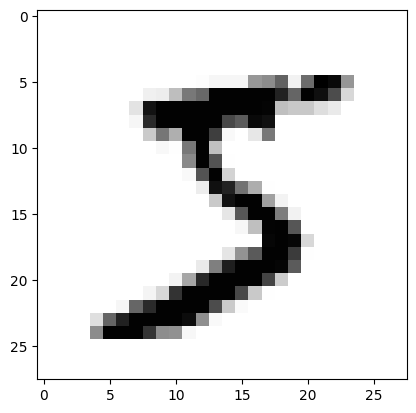

In [5]:
n=0

import matplotlib.pyplot as plt
sample = X[n].reshape(28,28)
plt.imshow(sample,cmap="Greys")
plt.show()

# Train

In [6]:
nn = NeuralNetwork(784,600,10,0.1)


In [7]:
for i in range(len(X)):
    info = X[i]
    t=np.zeros(10) +0.01
    t[int(Y[i])]=0.98
    normal_info = (info/255*0.99)+0.01
    nn.train(normal_info,t)

C:\Users\Sina's Pc\AppData\Local\Temp\ipykernel_15092\632545907.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t[int(Y[i])]=0.98


# Test dataset

In [8]:
dataset_test = pd.read_csv("mnist_test.csv")
X_test=np.asanyarray(dataset_test.iloc[:,1:],dtype=np.int16)
Y_test=np.asanyarray(dataset_test.iloc[:,:1],dtype=np.int16)

In [9]:
score = []

for i in range(len(X_test)):
    info = X_test[i]
    normal_info = (info/255*0.99)+0.01
    outs=nn.query(normal_info)
    if np.argmax(outs[0]) == Y_test[i]:
        score.append(1)
    else:
        score.append(0)


print(sum(score)/len(X_test))

0.9559


# Test Real Picture

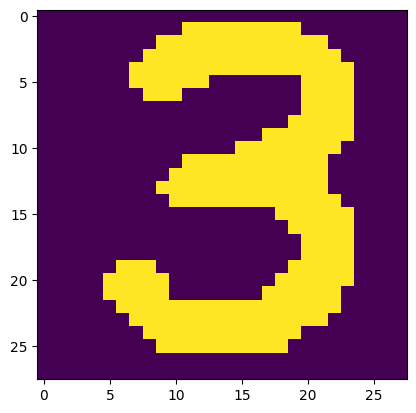

In [18]:
import cv2
img = cv2.imread("test.png", cv2.IMREAD_GRAYSCALE)
img = 255 - img  
plt.imshow(img)
plt.show()

In [19]:
img=img.flatten()
normal_info = (img/255*0.99)+0.01
outs=nn.query(normal_info)
print(np.argmax(outs[0])) 

3
